I. Manhattan Distance (L1 Distance)

In [16]:
from PIL import Image  # Đọc ảnh
import numpy as np  # Xử lý ma trận
import os  # Thao tác lấy tên file, move file của OS
import matplotlib.pyplot as plt

In [17]:
def read_image_from_path(path, size):
    im = Image.open(path).resize(size)
    return np.asarray(im, dtype=np.float32)


def folder_to_images(folder, size):
    list_dir = [folder + '/' + name for name in os.listdir(folder) if name.endswith((".jpg", ".png", ".jpeg"))]

    i = 0
    images_np = np.zeros(shape=(len(list_dir), *size, 3))
    images_path = []
    for path in list_dir:
        try:
            images_np[i] = read_image_from_path(path, size)
            images_path.append(path)
            i += 1

        except Exception:
            print("error: ", path)
    #             os.remove(path)

    images_path = np.array(images_path)
    return images_np, images_path

In [18]:
def manhattan_distance(img, array_img):
    abs_img = np.abs(img - array_img)
    return np.sum(abs_img, axis=(1, 2, 3))

In [19]:
def get_l1_score(root_img_path, query_path, size):
    dic_categories = ['scenery', 'furniture', 'animal', 'plant']
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder.split("_")[0] in dic_categories:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)
            rates = manhattan_distance(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score


def plot_results(query, ls_path_score):
    # Show query image
    plt.imshow(query / 255.0)
    # Score
    fig = plt.figure(figsize=(15, 15))
    columns = 4
    rows = 4
    for i, path in enumerate(sorted(ls_path_score, key=lambda x: x[1])[:16], 1):
        img = np.random.randint(10, size=(10, 10))
        fig.add_subplot(rows, columns, i)
        plt.imshow(plt.imread(path[0]))
        plt.axis("off")
    plt.show()

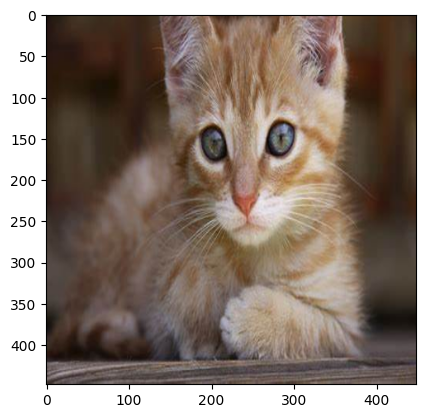

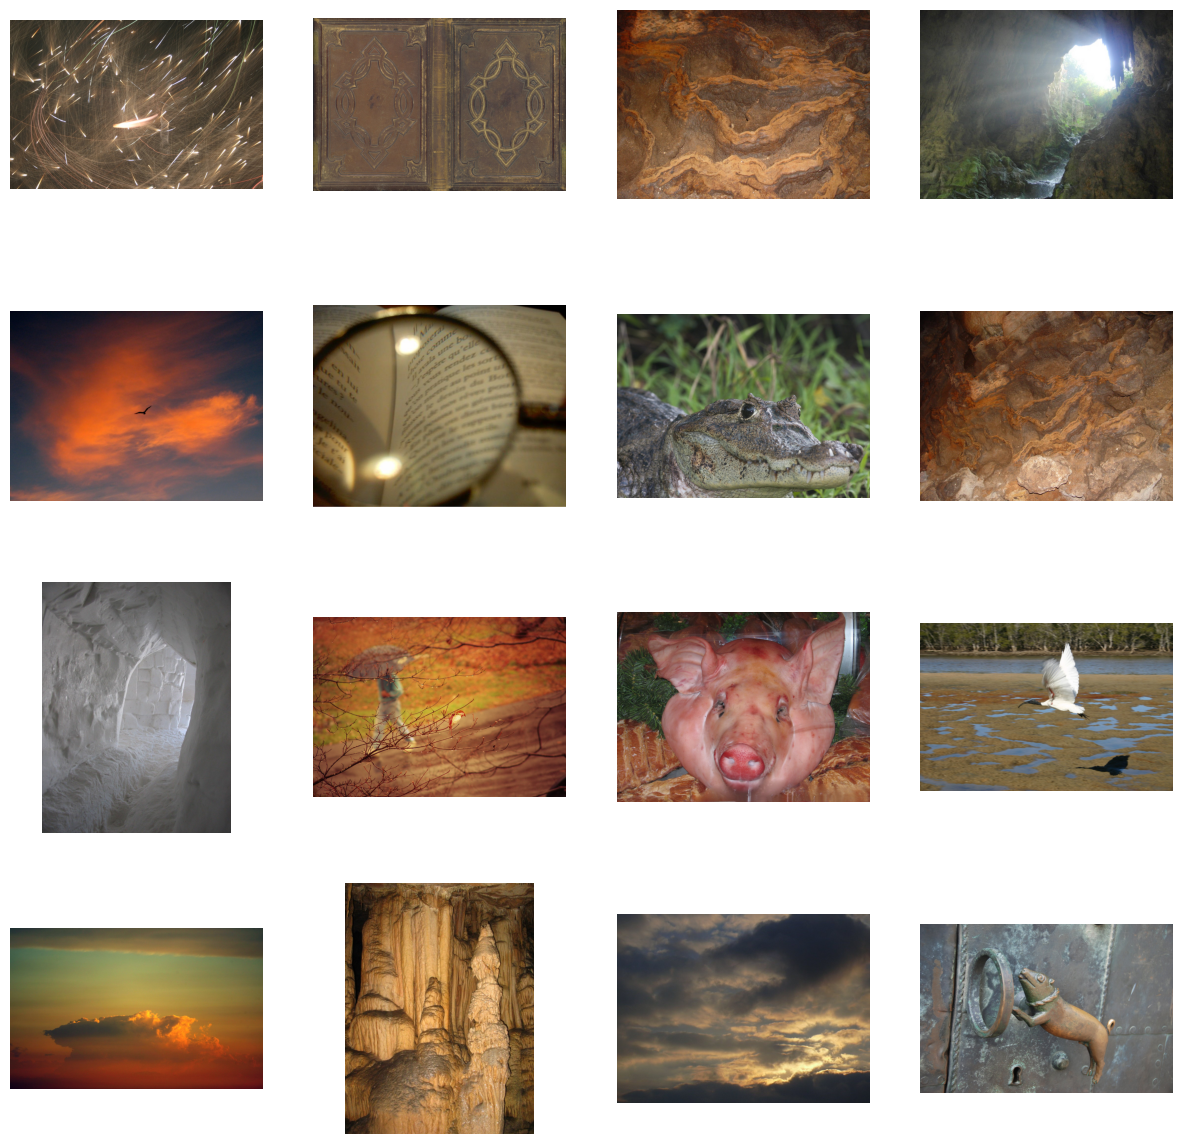

In [20]:
root_img_path = "images/"
query_path = "test/cat.jpg"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query, ls_path_score)

II. Euclidean Distance

In [23]:
def euclidian_distance(img, array_img):
    distance = (img - array_img) ** 2
    return np.mean(distance, axis=(1, 2, 3))

In [24]:
def get_l2_score(root_img_path, query_path, size):
    dic_categories = ['scenery', 'furniture', 'animal', 'plant']
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder.split("_")[0] in dic_categories:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)
            rates = euclidian_distance(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

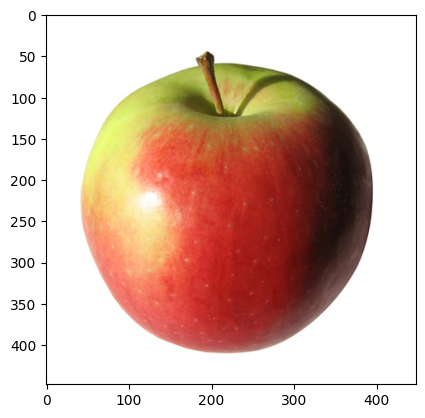

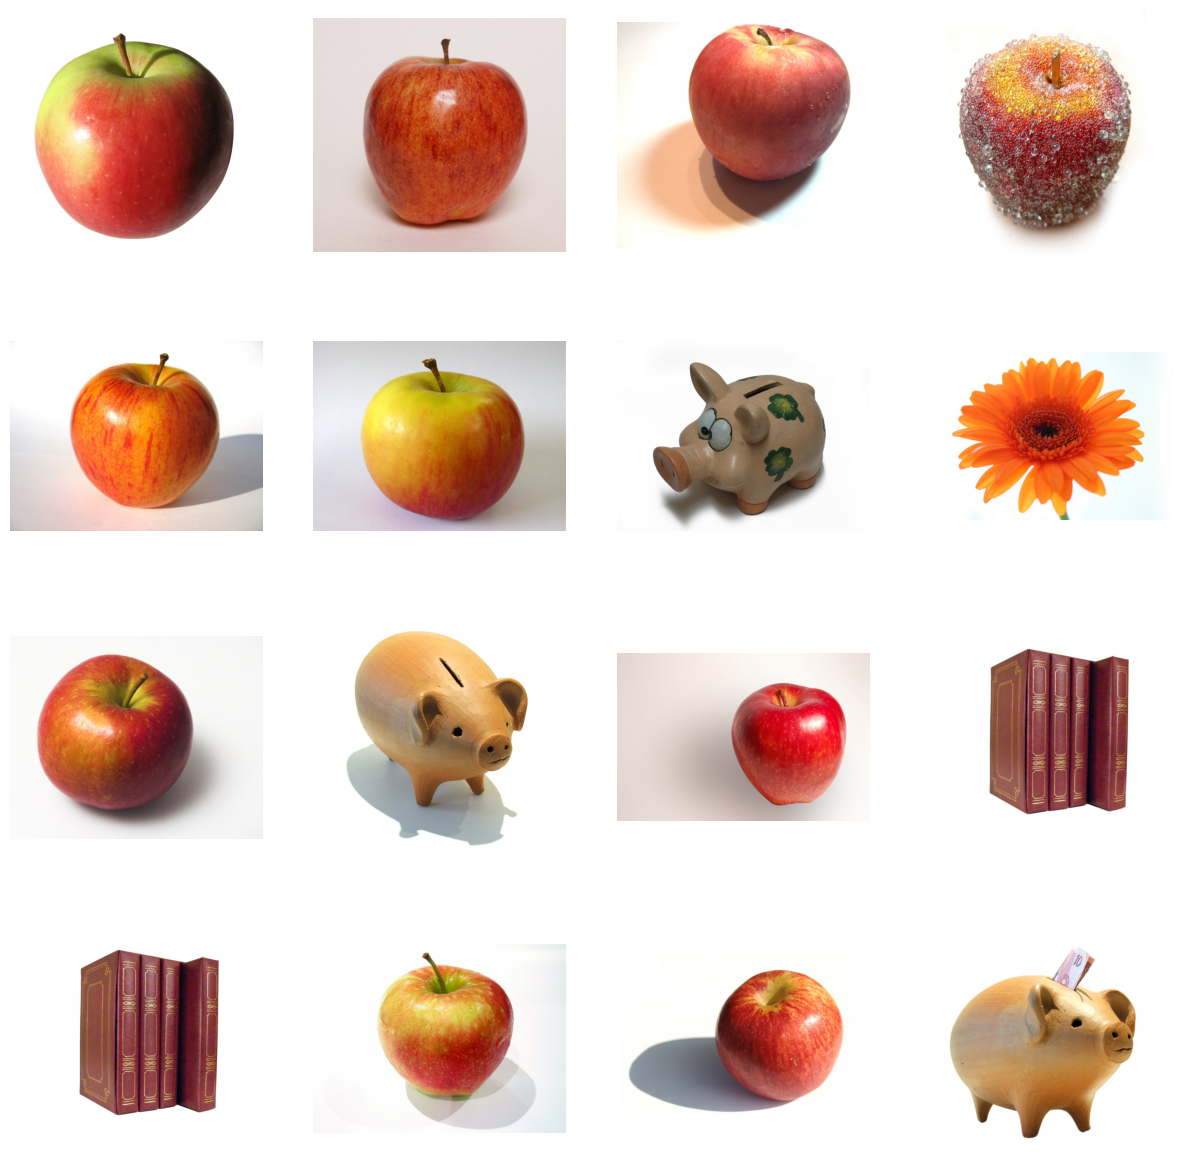

In [27]:
root_img_path = "images/"
query_path = "test/apple.jpg"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query, ls_path_score)

III. Cosine Similarity

In [32]:
def cosine_similarity(query, X):
    axis_batch_size = tuple(range(1, len(X.shape)))
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query ** 2))
    X_norm = np.sqrt(np.sum(X ** 2, axis=axis_batch_size))
    return np.sum(X * query, axis=axis_batch_size) / (query_norm * X_norm + np.finfo(float).eps)

In [35]:
def get_cosine_similarity_score(root_img_path, query_path, size):
    dic_categories = ['scenery', 'furniture', 'animal', 'plant']
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder.split("_")[0] in dic_categories:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)
            rates = cosine_similarity(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score


def plot_results(query, ls_path_score):
    # Show query image
    plt.imshow(query / 255.0)
    # Score
    fig = plt.figure(figsize=(15, 15))
    columns = 4
    rows = 4
    for i, path in enumerate(sorted(ls_path_score, key=lambda x: x[1], reverse=True)[:16], 1):
        img = np.random.randint(10, size=(10, 10))
        fig.add_subplot(rows, columns, i)
        plt.imshow(plt.imread(path[0]))
        plt.axis("off")
    plt.show()

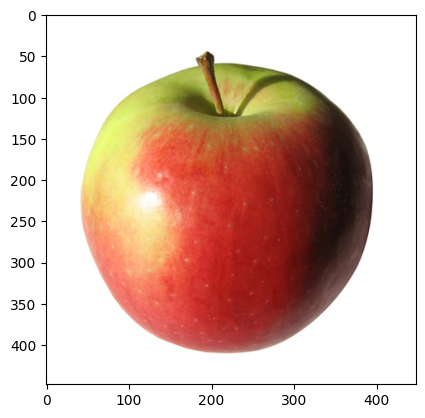

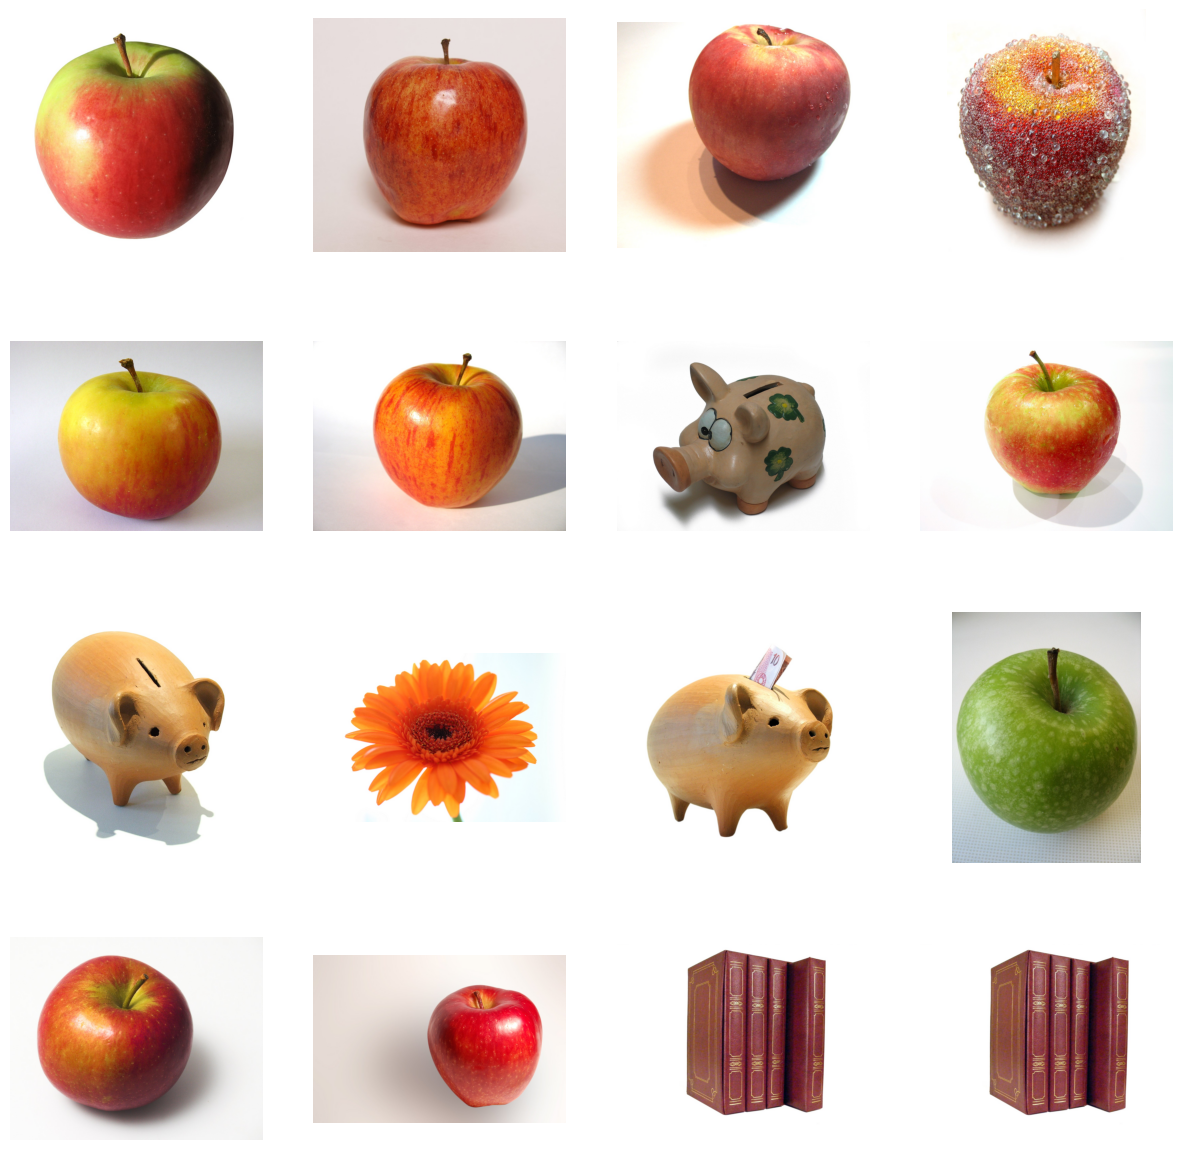

In [36]:
root_img_path = "images/"
query_path = "test/apple.jpg"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query, ls_path_score)